##  Final Project - Application of Random Forest

Explanation about the problem

## Data Acquisition
The data was taken from kaggle: [https://www.kaggle.com/imohtn/video-games-rating-by-esrb]

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
RSEED=50

In [40]:
df = pd.read_csv('/Users/jjimenez/Documents/Estudio/College/George Brown/Semester I/Math Concepts for ML/GBC-MCfML/final_project/data/Video_games_esrb_rating.csv')
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [5]:
df_number = df.select_dtypes('number')
df_number

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,1,0,0,0,0,0
1891,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1893,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_object = df.select_dtypes('object')
df_object

,title,esrb_rating
0,Monster Jam Steel Titans 2,E
1,Subnautica: Below Zero,ET
2,NIER REPLICANT VER.1.22474487139…,M
3,Jamestown+,ET
4,Neptunia Virtual Stars,T
...,...,...
1890,SENRAN KAGURA Peach Beach Splash,M
1891,Sneaky Bears,T
1892,SPARC,E
1893,Still Time,T


## Label exploration

(array([416.,   0.,   0., 403.,   0.,   0., 387.,   0.,   0., 689.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

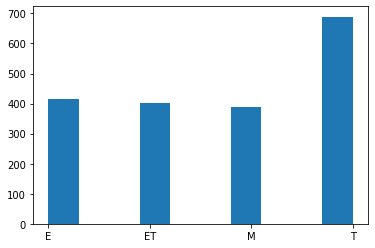

In [15]:
plt.hist(df['esrb_rating'])
# E: Everyone
# ET: 
# M: Mature
# T: Teen

In [16]:
df['esrb_rating'].value_counts()

T     689
E     416
ET    403
M     387
Name: esrb_rating, dtype: int64

In [41]:
df = df.drop(columns='title')

## Split Data into Training and Testing Set

In [42]:
from sklearn.model_selection import train_test_split


labels = np.array(df.pop('esrb_rating'))


train, test, train_labels, test_labels = train_test_split(df, labels, 
                                                          stratify = labels,
                                                          test_size = 0.3, 
                                                          random_state = RSEED)

In [43]:
print(train.shape)
print(test.shape)

(1326, 32)
(569, 32)


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [46]:
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=50,
                       verbose=1)

In [47]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 411
Average maximum depth 27


In [48]:
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [53]:
train_rf_probs

array([0.10405188, 0.        , 0.        , ..., 0.40362843, 0.18      ,
       0.        ])

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_rf_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, rf_probs)}')

In [66]:
train_labels_df = pd.DataFrame(train_labels)
train_labels_df[0].unique()

array(['T', 'M', 'E', 'ET'], dtype=object)

In [ ]:
roc = {label: [] for label in train_labels_df[0].unique()}
for label in train_labels_df[0].unique():
    model.fit(train, label)
    predictions_proba = model.predict_proba(test)
    roc[label] += roc_auc_score(test_labels, predictions_proba[:,1])

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

cm = confusion_matrix(y_actual, y_predict)
accuracy = accuracy_score(y_actual, y_predict)
precision = precision_score(y_actual, y_predict, average="weighted")

accuracy, precision